In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ps = pd.read_csv('pop_synth20.csv')
rl = pd.read_csv('rl20.csv')
mt = pd.read_csv('massTr20.csv')

# RLOF

Semi_Detached: 58.29% 
Detached: 38.12%
MS: 3.59%


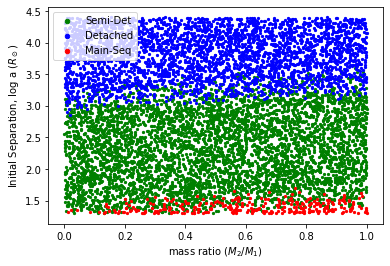

In [3]:
MS = (rl['Radius'] >= rl['Roche']) & (rl['Core'] < 1.4)
Semi_Detached = (rl['Radius'] >= rl['Roche']) & (rl['Core'] >= 1.4)
Detached = (rl['Radius'] < rl['Roche'])

print("Semi_Detached: {0:.2f}% ".format(len(rl[Semi_Detached])*100 / len(rl)))
print("Detached: {0:.2f}%".format(len(rl[Detached])*100 / len(rl)))
print("MS: {0:.2f}%".format(len(rl[MS])*100 / len(rl)))

# Scatter plot of spread up to RLOF

rl['semi'] = np.log10(rl['a'])
rl['q'] = rl['M2'] / rl['M1']

s = 5
ax = rl[Semi_Detached].plot.scatter('q', 'semi', c='g', s=s, label='Semi-Det')
rl[Detached].plot.scatter('q', 'semi', c='b', s=s, label='Detached', ax=ax)
#rl[Contact].plot.scatter('q', 'semi', c='r', s=s, label='Contact ({0:.2f}%)'.format(len(rl[Contact])*100 / len(rl)), ax=ax)
rl[MS].plot.scatter('q', 'semi', c='r', s=s, label='Main-Seq', ax=ax)

plt.legend(loc='upper left', markerscale=2)
plt.xlabel('mass ratio ($M_2 / M_1$)')
plt.ylabel('Initial Separation, log a ($R_\odot$)')

plt.savefig('rlof.png')

# Mass Transfer

In [4]:
mt

,M1,M2,a,M1_MT,M2_MT,a_MT,Transfer
0,21,11.71,20.03,0.00,32.41,NaN,Merger
1,14,4.14,20.04,0.00,18.00,NaN,Merger
2,8,3.94,20.12,1.56,10.39,76.71,Stable
3,9,1.01,20.14,1.79,1.01,0.30,Unstable
4,9,6.15,20.14,0.00,15.15,NaN,Merger
...,...,...,...,...,...,...,...
8356,17,5.54,25023.14,14.91,5.54,27577.48,Wide
8357,19,15.79,25030.93,16.11,15.79,27299.69,Wide
8358,11,9.55,25044.64,10.20,9.55,26053.86,Wide
8359,18,5.99,25064.64,15.57,5.99,27892.14,Wide


In [5]:
pd.get_dummies(mt.Transfer)

,Merger,Stable,Unstable,Wide
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
8356,0,0,0,1
8357,0,0,0,1
8358,0,0,0,1
8359,0,0,0,1


Wide: 38.12%
Stable: 33.42%
Unstable: 24.88%


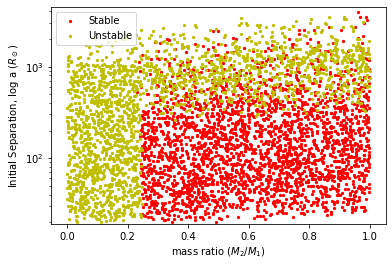

In [5]:
Stable = (mt.Transfer == 'Stable') 
Unstable = (mt.Transfer == 'Unstable')
Wide = (mt.Transfer == 'Wide')

print("Wide: {0:.2f}%".format(len(rl[Wide])*100 / len(rl)))
print("Stable: {0:.2f}%".format(len(rl[Stable])*100 / len(rl)))
print("Unstable: {0:.2f}%".format(len(rl[Unstable])*100 / len(rl)))

s = 5
ax = rl[Stable].plot.scatter('q', 'a', c='r', s=s, label='Stable', logy=True)
rl[Unstable].plot.scatter('q', 'a', c='y', s=s, label='Unstable', ax=ax)
#rl[Wide].plot.scatter('q', 'a', c='b', s=s, label='Wide', ax=ax)


plt.legend(loc='upper left')
plt.ylim(19, 4500)
plt.xlabel('mass ratio ($M_2 / M_1$)')
plt.ylabel('Initial Separation, log a ($R_\odot$)')
plt.savefig('MTcase.png')




CEE: 25.76%
Stable: 54.00%
Merger: 20.26%


Text(0, 0.5, 'Initial Separation, log a ($R_\\odot$)')

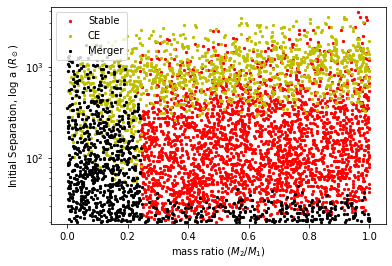

In [6]:

Merger = (mt.Transfer == 'Merger') | (mt.a_MT <= 0.5* (mt.M1_MT * mt.M1_MT))
CEE = (mt.Transfer == 'Unstable') & (mt.a_MT > 0.5* (mt.M1_MT * mt.M1_MT))
Stable = (mt.Transfer == 'Stable') 
Wide = (mt.Transfer == 'Wide')

Trans = (mt.Transfer != 'Wide')

print("CEE: {0:.2f}%".format(len(mt[CEE])*100 / len(mt[Trans])))
print("Stable: {0:.2f}%".format(len(mt[Stable])*100 / len(mt[Trans])))
print("Merger: {0:.2f}%".format(len(mt[Merger])*100 / len(mt[Trans])))
#print("Wide: {0:.2f}%".format(len(mt[Wide])*100 / len(mt)))


mt['semi'] = np.log10(mt['a'])
mt['q'] = mt['M2'] / mt['M1']


s = 5
ax = mt[Stable].plot.scatter('q', 'a', c='r', s=s, label='Stable', logy=True)
mt[CEE].plot.scatter('q', 'a', c='y', s=s, label='CE', ax=ax)
mt[Merger].plot.scatter('q', 'a', c='k', s=s, label='Merger', ax=ax)
#mt[Wide].plot.scatter('q', 'a', c='b', s=s, label='Wide', ax=ax)


plt.legend(loc='upper left')
plt.ylim(19, 4500)
plt.xlabel('mass ratio ($M_2 / M_1$)')
plt.ylabel('Initial Separation, log a ($R_\odot$)')
#plt.savefig('MTcase.png')




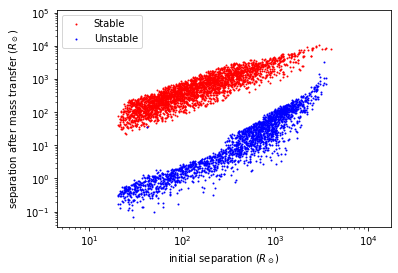

In [7]:
# Change in a during mass transfer
s = 1
ax = mt[Stable].plot.scatter('a', 'a_MT', color='red', s=s, label='Stable', loglog=True)
#MT[Single].plot.scatter('a_MT', 'a', color='green', label='Wide', loglog=True, ax=ax)
mt[CEE].plot.scatter('a', 'a_MT', color='blue', s=s, label='Unstable', ax=ax)
mt[Merger].plot.scatter('a', 'a_MT', color='blue', s=s, ax=ax)

plt.ylabel('separation after mass transfer ($R_\odot$)')
plt.xlabel('initial separation ($R_\odot$)')
plt.legend(loc='upper left')
#plt.savefig('Change_in_a_1.png')

# SUPERNOVA

In [8]:
# Create pre-SN dataframe

data = {'M1':mt['M1'], 'M2':mt['M2'], 'a':mt['a'], 'Mc': 1.4, 'M1_SN':mt['M1_MT'], 
        'M2_SN':mt['M2_MT'], 'a_SN':mt['a_MT'], 'Del_M': mt['M1_MT'] - 1.4, 
        'V_orb': np.round(np.sqrt( (1.9e5 * (mt['M1_MT'] + mt['M2_MT'])) / mt['a_MT']), 2),
       'Transfer': mt['Transfer']}
sn = pd.DataFrame(data)
sn.fillna(0, inplace=True)
filt = (sn.a_SN != 0 )
sn = sn[filt].copy()
sn.reset_index(inplace=True)
sn

,index,M1,M2,a,Mc,M1_SN,M2_SN,a_SN,Del_M,V_orb,Transfer
0,2,8,3.94,20.12,1.4,1.56,10.39,76.71,0.16,172.04,Stable
1,3,9,1.01,20.14,1.4,1.79,1.01,0.30,0.39,1331.67,Unstable
2,7,10,3.47,20.19,1.4,2.12,11.17,42.17,0.72,244.70,Stable
3,15,11,0.36,20.32,1.4,2.42,0.36,0.17,1.02,1762.69,Unstable
4,30,9,1.17,20.49,1.4,1.79,1.17,0.32,0.39,1325.71,Unstable
...,...,...,...,...,...,...,...,...,...,...,...
8056,8356,17,5.54,25023.14,1.4,14.91,5.54,27577.48,13.51,11.87,Wide
8057,8357,19,15.79,25030.93,1.4,16.11,15.79,27299.69,14.71,14.90,Wide
8058,8358,11,9.55,25044.64,1.4,10.20,9.55,26053.86,8.80,12.00,Wide
8059,8359,18,5.99,25064.64,1.4,15.57,5.99,27892.14,14.17,12.12,Wide


In [9]:
# Kick directions

def kick_dir(size=20):
        xi = np.linspace(0, 1, size)
        xj = np.linspace(0, 1, size)
        theta = 2 * np.pi * xi
        z = 2 * xj - 1
        R = np.sqrt(1 - z**2)
        x = R * np.cos(theta)
        y = R * np.sin(theta)
        return x, y, z, theta

# Post-Supernova Values

def supernova(f, M1, M2, a, V_k=0):
    global V_orb
    Mc = 1.4 
    mu = (Mc * M2) / (Mc + M2)
    G = 1.9e5

    V_orb = np.sqrt((G * (M1 + M2)) / a)

    V = np.sqrt((V_orb + (V_k * f[0]))**2 + 
                (V_k * f[1])**2 + (V_k * f[2])**2)

    E_kin = 0.5 * mu * V**2
    E_pot = - ( G * Mc * M2 ) / ( a )
    E_tot = E_kin + E_pot
    return E_tot


In [ ]:
# Test for boundness sn dataframe

Test = kick_dir(20)
kick = np.linspace(1, 1000, 100)

for k in range(len(sn)):
    V_orb = sn['V_orb'].iloc[k]
    V_o = np.array([sn['V_orb'].iloc[k], 0, 0])
    
    M1 = sn['M1_SN'].iloc[k]
    M2 = sn['M2_SN'].iloc[k]
    a = sn['a_SN'].iloc[k]
    
    Vk = []
    Theta = []
    E = []
    Kick = []
    
    for i in range(len(kick)):
        for j in range(len(Test[0])):
            Vk.append(np.array([kick[i]*Test[0][j], kick[i]*Test[1][j], kick[i]*Test[2][j]]))
            Theta.append(Vk[j].dot(V_o)/(np.sqrt(Vk[j][0]**2 + Vk[j][1]**2 + Vk[j][2]**2) * V_orb))
            E.append(supernova(Test, M1, M2, a, kick[i])[j])
            Kick.append(kick[i])
    bound = [b for b in E if b <0]
    unbound = [b for b in E if b >=0]
    percentage = (len(bound) / (len(bound) + len(unbound)))
    sn.at[k, 'Bound'] = percentage
            

In [8]:
#sn.to_csv(r'C:\Users\mosea\OneDrive\Documents\Python Scripts\ASTK02\sn20.csv',index=False)
sn = pd.read_csv('sn20.csv')

In [9]:
sn

,index,M1,M2,a,Mc,M1_SN,M2_SN,a_SN,Del_M,V_orb,Transfer,Bound
0,2,8,3.94,20.12,1.4,1.56,10.39,76.71,0.16,172.04,Stable,0.220
1,3,9,1.01,20.14,1.4,1.79,1.01,0.30,0.39,1331.67,Unstable,0.897
2,7,10,3.47,20.19,1.4,2.12,11.17,42.17,0.72,244.70,Stable,0.300
3,15,11,0.36,20.32,1.4,2.42,0.36,0.17,1.02,1762.69,Unstable,0.780
4,30,9,1.17,20.49,1.4,1.79,1.17,0.32,0.39,1325.71,Unstable,0.899
...,...,...,...,...,...,...,...,...,...,...,...,...
8056,8356,17,5.54,25023.14,1.4,14.91,5.54,27577.48,13.51,11.87,Wide,0.004
8057,8357,19,15.79,25030.93,1.4,16.11,15.79,27299.69,14.71,14.90,Wide,0.016
8058,8358,11,9.55,25044.64,1.4,10.20,9.55,26053.86,8.80,12.00,Wide,0.015
8059,8359,18,5.99,25064.64,1.4,15.57,5.99,27892.14,14.17,12.12,Wide,0.004


In [59]:
post = sn.copy()
mu = (post.M2_SN * 1.4) / (post.M2_SN + 1.4)
post['V_min'] = np.sqrt((2 * 1.9e5 * 1.4 * post.M2_SN) / (mu * post.a_SN)) - post.V_orb


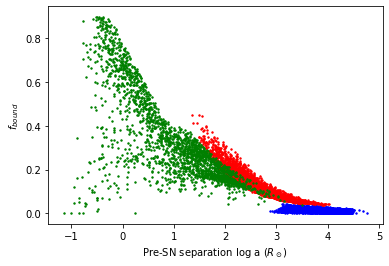

In [60]:
Wide = post['Transfer'] == 'Wide'
Stable = post.Transfer == 'Stable'
Unstable = post.Transfer == 'Unstable'

plt.scatter(np.log10(post[Wide].a_SN), post[Wide].Bound, c='b', s=2)
plt.scatter(np.log10(post[Stable].a_SN), post[Stable].Bound, c='r', s=2)
plt.scatter(np.log10(post[Unstable].a_SN), post[Unstable].Bound, c='g', s=2)
plt.xlabel("Pre-SN separation log a $(R_\odot)$")
plt.ylabel("$f_{bound}$")
plt.yscale=('log')

#plt.savefig("Bound_a.png")

In [61]:
print(len(post[Stable])/len(post))
print(len(post[Unstable])/len(post))
print(len(post[Wide])/len(post))


0.34660712070462724
0.25803250217094653
0.39536037712442623


0.13196886184681547
0.115


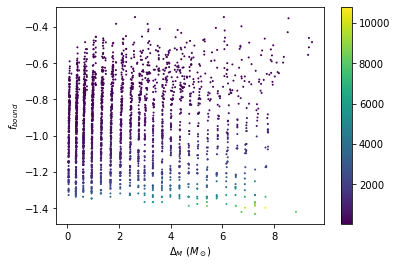

In [62]:
print(post[Stable].Bound.mean())
print(post[Stable].Bound.median())

c = post[Stable].a_SN

plt.scatter(post[Stable].Del_M, np.log10(post[Stable].Bound), c=c, s=1)
plt.xlabel("$\Delta_M\ (M_\odot)$")
plt.ylabel("$f_{bound}$")
plt.colorbar()



#plt.savefig("Bound_a_DelM.png")

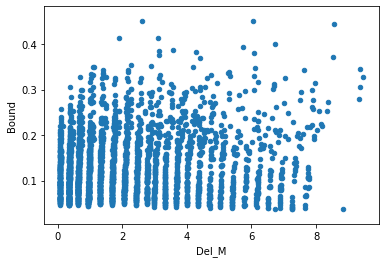

In [15]:
post[Stable].plot.scatter('Del_M', 'Bound')

0.3395778846153852
0.273


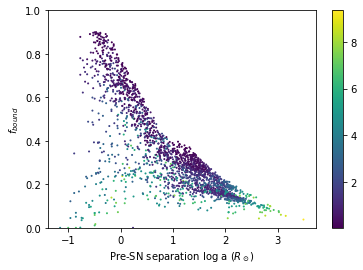

In [43]:
print(post[Unstable].Bound.mean())
print(post[Unstable].Bound.median())

c = post[Unstable].Del_M

plt.scatter(np.log10(post[Unstable].a_SN), post[Unstable].Bound, c=c, s=1)
plt.xlabel("Pre-SN separation log a $(R_\odot)$")
plt.ylabel("$f_{bound}$")
plt.colorbar()
plt.yscale=('log')
plt.ylim(0,1)

plt.savefig("Bound_a_Unstable.png")

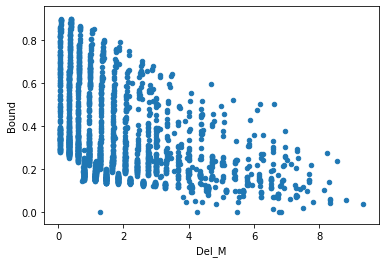

In [18]:
post[Unstable].plot.scatter('Del_M', 'Bound')

0.012815186695952474
0.011000000000000001


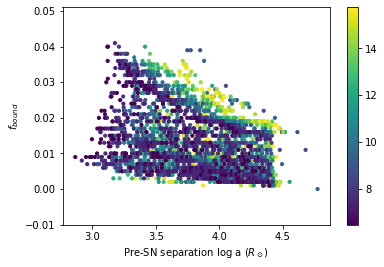

In [21]:
print(post[Wide].Bound.mean())
print(post[Wide].Bound.median())

c = post[Wide].Del_M

plt.scatter(np.log10(post[Wide].a_SN), post[Wide].Bound, c=c, s=10)
plt.xlabel("Pre-SN separation log a $(R_\odot)$")
plt.ylabel("$f_{bound}$")
plt.colorbar()
#plt.yscale=('log')

#plt.savefig("Bound_a_Wide.png")

In [22]:
excl = (post.Transfer != 'Wide')
print(post[excl].Bound.mean())
print(post[excl].Bound.median())
print(post.Bound.mean())
print(post.Bound.median())

0.22056688551497733
0.16649999999999998
0.13843009552164878
0.08199999999999999


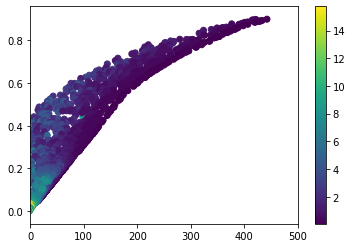

In [23]:
c = (post['Del_M'])
plt.scatter(post.V_min, post.Bound, c=c)
plt.xlim(0, 500)
plt.colorbar()

# Betelgeuse

In [55]:
#candidates = (post.M2 >= 8) & (post.M2 <= 20) & (post.M2_SN >= 13) & (post.M2_SN <= 18)
candidates = (post.M2_SN >= 13) & (post.M2_SN <= 18)
Betel = post[candidates].copy()

In [56]:
Betel['V_esc'] = (Betel.M1_SN / (Betel.M1_SN + Betel.M2_SN)) * Betel.V_orb
#Betel.to_csv(r'C:\Users\mosea\OneDrive\Documents\Python Scripts\ASTK02\massTr20.csv',index=False)

In [57]:
Wide = Betel['Transfer'] == 'Wide'
Stable = Betel.Transfer == 'Stable'
Unstable = Betel.Transfer == 'Unstable'

print(len(Betel)/len(ps))
print(len(Betel[Stable])/len(Betel))
print(len(Betel[Unstable])/len(Betel))
print(len(Betel[Wide])/len(Betel))

0.14029422317904558
0.7791986359761296
0.05711849957374254
0.1636828644501279


C:\Users\mosea\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mosea\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


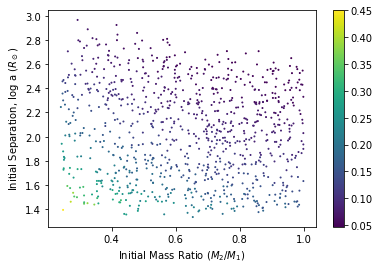

In [64]:
c = Betel[Stable].Bound
plt.scatter(Betel[Stable].M2/Betel[Stable].M1, np.log10(Betel[Stable].a), c=c, s=1)
plt.xlabel('Initial Mass Ratio ($M_2/M_1$)')
plt.ylabel('Initial Separation, log a ($R_\odot$)')
plt.colorbar()

plt.savefig("Betel_Stable_M2.png")

C:\Users\mosea\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mosea\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


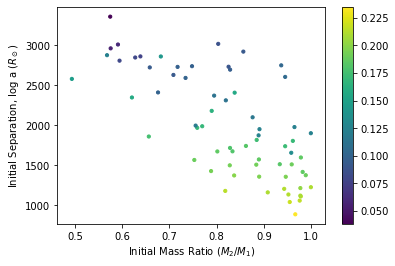

In [63]:
c = Betel[Unstable].Bound
plt.scatter(Betel[Unstable].M2/Betel[Unstable].M1, Betel[Unstable].a, c=c, s=10)
plt.xlabel('Initial Mass Ratio ($M_2/M_1$)')
plt.ylabel('Initial Separation, log a ($R_\odot$)')
plt.colorbar()

#plt.savefig("Betel_Unstable_M2.png")

0.13067913760304434
0.114


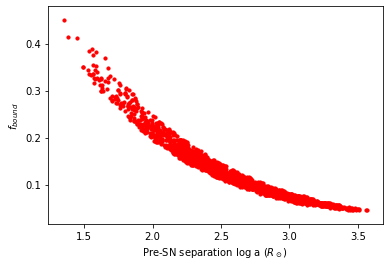

In [29]:
print(Betel[Stable].Bound.mean())
print(Betel[Stable].Bound.median())

c = Betel[Stable].M2

plt.scatter(np.log10(Betel[Stable].a_SN), Betel[Stable].Bound, c='r', s=10)
plt.xlabel("Pre-SN separation log a $(R_\odot)$")
plt.ylabel("$f_{bound}$")
#plt.colorbar()
plt.yscale=('log')

plt.savefig("Betel_a_Stable.png")

0.1626384615384615
0.175


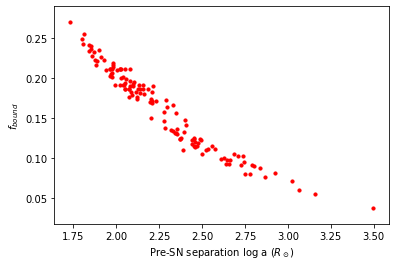

In [30]:
print(Betel[Unstable].Bound.mean())
print(Betel[Unstable].Bound.median())

c = Betel[Unstable].M2

plt.scatter(np.log10(Betel[Unstable].a_SN), Betel[Unstable].Bound, c='r', s=10)
plt.xlabel("Pre-SN separation log a $(R_\odot)$")
plt.ylabel("$f_{bound}$")
#plt.colorbar()
plt.yscale=('log')

plt.savefig("Betel_a_Unstable.png")

In [31]:
print(Betel[Wide].Bound.mean())
print(Betel[Wide].Bound.median())

0.021620603015075374
0.02


In [32]:
Betel[Wide]

,index,M1,M2,a,Mc,M1_SN,M2_SN,a_SN,Del_M,V_orb,Transfer,Bound,V_min,V_esc
5090,5390,13,11.44,2042.60,1.4,11.88,11.44,2140.51,10.48,45.50,Wide,0.037,2.243657,23.179245
5112,5412,12,11.12,2070.83,1.4,11.04,11.12,2160.17,9.64,44.15,Wide,0.036,2.779940,21.995307
5137,5437,13,11.08,2107.23,1.4,11.88,11.08,2209.81,10.48,44.43,Wide,0.035,1.895661,22.989042
5272,5572,15,13.38,2349.13,1.4,13.37,13.38,2491.92,11.97,45.16,Wide,0.036,2.314671,22.571559
5290,5590,16,13.05,2393.24,1.4,14.18,13.05,2553.24,12.78,45.01,Wide,0.035,1.364571,23.438920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,8331,13,11.69,24475.69,1.4,11.88,11.69,25636.32,10.48,13.22,Wide,0.016,0.709444,6.663284
8042,8342,17,11.81,24742.85,1.4,14.91,11.81,26675.90,13.51,13.80,Wide,0.009,-0.082225,7.700524
8044,8344,24,19.04,24781.75,1.4,16.99,19.04,29601.38,15.59,15.21,Wide,0.017,0.988555,7.172298
8048,8348,22,19.84,24856.13,1.4,17.13,19.84,28132.22,15.73,15.80,Wide,0.018,1.138192,7.320909


In [33]:
excl = (Betel.Transfer != 'Wide') 
print(Betel[excl].Bound.mean())
print(Betel[excl].Bound.median())
print(Betel.Bound.mean())
print(Betel.Bound.median())

0.1331130638547165
0.11699999999999999
0.11203277909738739
0.09699999999999999


,index,M1,M2,a,Mc,M1_SN,M2_SN,a_SN,Del_M,V_orb,Transfer,Bound,V_min,V_esc,Unbound
2,7,10,3.47,20.19,1.4,2.12,11.17,42.17,0.72,244.70,Stable,0.300,91.856232,39.034161,0.700
5,57,11,3.54,21.00,1.4,2.43,11.90,37.13,1.03,270.79,Stable,0.326,98.149491,45.919030,0.674
12,81,10,3.75,21.41,1.4,2.16,11.41,48.48,0.76,230.61,Stable,0.285,86.262870,36.707266,0.715
13,84,10,4.49,21.44,1.4,2.13,12.18,62.52,0.73,208.54,Stable,0.257,78.757733,31.040545,0.743
17,102,9,4.57,21.63,1.4,1.86,11.70,76.71,0.46,183.27,Stable,0.229,71.472528,25.138805,0.771
18,103,9,5.88,21.63,1.4,1.84,13.04,104.99,0.44,164.10,Stable,0.206,64.513265,20.291935,0.794
19,106,11,3.14,21.65,1.4,2.50,11.41,30.83,1.10,292.79,Stable,0.351,104.565840,52.622214,0.649
24,121,11,3.44,22.02,1.4,2.50,11.71,35.68,1.10,275.08,Stable,0.333,98.583538,48.395496,0.667
25,123,10,5.03,22.03,1.4,2.14,12.71,73.37,0.74,196.10,Stable,0.241,74.231121,28.259529,0.759
26,124,9,5.57,22.07,1.4,1.86,12.71,99.02,0.46,167.20,Stable,0.210,65.498640,21.344681,0.790


In [35]:
Betel['Unbound'] = 1 - Betel.Bound
Betel

,index,M1,M2,a,Mc,M1_SN,M2_SN,a_SN,Del_M,V_orb,Transfer,Bound,V_min,V_esc,Unbound
2,7,10,3.47,20.19,1.4,2.12,11.17,42.17,0.72,244.70,Stable,0.300,91.856232,39.034161,0.700
5,57,11,3.54,21.00,1.4,2.43,11.90,37.13,1.03,270.79,Stable,0.326,98.149491,45.919030,0.674
12,81,10,3.75,21.41,1.4,2.16,11.41,48.48,0.76,230.61,Stable,0.285,86.262870,36.707266,0.715
13,84,10,4.49,21.44,1.4,2.13,12.18,62.52,0.73,208.54,Stable,0.257,78.757733,31.040545,0.743
17,102,9,4.57,21.63,1.4,1.86,11.70,76.71,0.46,183.27,Stable,0.229,71.472528,25.138805,0.771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,8331,13,11.69,24475.69,1.4,11.88,11.69,25636.32,10.48,13.22,Wide,0.016,0.709444,6.663284,0.984
8042,8342,17,11.81,24742.85,1.4,14.91,11.81,26675.90,13.51,13.80,Wide,0.009,-0.082225,7.700524,0.991
8044,8344,24,19.04,24781.75,1.4,16.99,19.04,29601.38,15.59,15.21,Wide,0.017,0.988555,7.172298,0.983
8048,8348,22,19.84,24856.13,1.4,17.13,19.84,28132.22,15.73,15.80,Wide,0.018,1.138192,7.320909,0.982


In [36]:
Betel[Unstable]['Bound'].idxmax()
#Betel.Unbound.min()

3793

In [69]:
Betel[Stable].V_min.mean()

C:\Users\mosea\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


37.30140422858207